In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
# Load the dataset
df = pd.read_csv('labeled_desc_cleaned.csv').dropna()

### Step 1: Basic Overview of the Data

- We will examine the first few rows of the dataset to understand its structure and the types of information it contains.


In [58]:
df.head()

,out,text
0,0.0,job
1,0.0,seo director technical focus
2,0.0,seeking experienced seo director lead agency s...
3,0.0,"role, youll drive organic growth client innova..."
4,0.0,responsibilities:


### Step 2: Summary Statistics of the 1/0 Label

- Checking distribution of the labels to see if the dataset is balanced

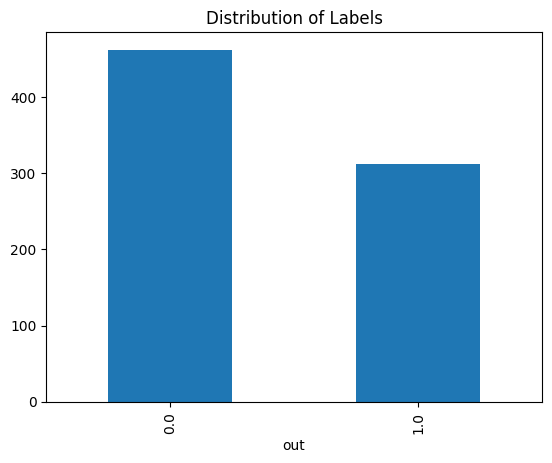

In [10]:
df['out'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.show()

### Comments

- While there are more instances labeled as `0` compared to `1`, the difference is not extreme.
  
- The distribution is fairly balanced, so there is no immediate need for class balancing techniques like oversampling or undersampling.

- However, it's important to monitor performance on both classes during model evaluation to ensure that the model handles both classes effectively.


### Step 4: Text Length Distribution

- We will calculate the length of the text in each row by counting the number of tokens in each job description.


In [65]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

- We will visualize the distribution of text lengths to observe the variability and typical range of description lengths in the dataset.


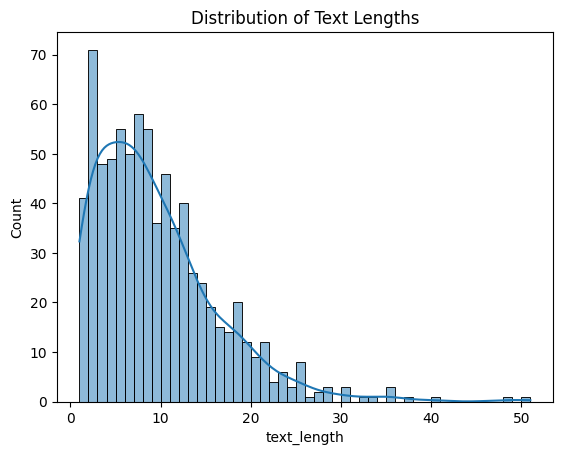

In [66]:
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

### Comments

- The distribution is right-skewed, meaning most of the text entries are relatively short, with a long tail of longer entries.
  
- The majority of text entries have a length between 5 to 15 tokens, suggesting that the descriptions are generally concise.

- There are a few outliers with longer text lengths, but they are not frequent.

- Overall, the text cleaning process appears consistent, as there are no extremely short or excessively long texts that might indicate incomplete or erroneous cleaning.


### Step 5: Bigram/Trigram Analysis
- Using CountVectorizer to extract bigrams and trigrams


In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['text'])
ngram_freq = Counter(vectorizer.get_feature_names_out())

# Top 10 most common bigrams/trigrams
ngram_freq.most_common(10)

### Comments

- The initial bigram/trigram analysis revealed a significant presence of numeric values, which are not relevant to the text analysis.

- To improve the quality of the analysis, we will remove numeric tokens from the text before performing n-gram extraction.


In [62]:
import re

# Remove numbers from the text before performing the n-gram analysis
df['text_cleaned'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Step 6: Bigram/Trigram Analysis after cleaning numbers
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['text_cleaned'])
ngram_freq = Counter(vectorizer.get_feature_names_out())

# Top 10 most common bigrams/trigrams after cleaning
ngram_freq.most_common(10)

[('ability communicate', 1),
 ('ability communicate complex', 1),
 ('ability commute', 1),
 ('ability demonstrate', 1),
 ('ability demonstrate effective', 1),
 ('ability empower', 1),
 ('ability empower business', 1),
 ('ability exercise', 1),
 ('ability exercise discretion', 1),
 ('ability experience', 1)]

### Comments

- The initial bigram/trigram results still contained repetitive phrases such as "ability" or "communicate," which are common in job descriptions.

- To improve this, we will add a custom stopword list to filter out such terms and set a minimum frequency filter (`min_df=2`) to include only n-grams that appear more than once.

- This approach helps to focus on more meaningful terms and phrases in the dataset.


In [16]:
# Custom stopwords list to remove common words like 'ability', 'experience', etc.
custom_stopwords = ['ability', 'experience', 'communicate', 'demonstrate', 'empower', 'exercise']

# Step 6: Bigram/Trigram Analysis with custom stopwords and minimum frequency filter
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words=custom_stopwords, min_df=2)
X = vectorizer.fit_transform(df['text_cleaned'])
ngram_freq = Counter(vectorizer.get_feature_names_out())

# Top 10 most common bigrams/trigrams after applying custom stopwords and minimum frequency filter
ngram_freq.most_common(10)


[('across multiple', 1),
 ('actionable insight', 1),
 ('address complex', 1),
 ('adp global', 1),
 ('adp global leader', 1),
 ('advanced analytical', 1),
 ('advanced analytics', 1),
 ('advanced analytics machine', 1),
 ('advanced degree', 1),
 ('advanced statistical', 1)]

### Comments

- After applying a custom stopword list and a minimum frequency filter (`min_df=2`), the bigram/trigram analysis now shows more meaningful phrases.

- The results highlight key terms and concepts such as "actionable insight," "advanced analytics," and "advanced degree," which are more relevant for understanding the context of the job descriptions.

- These improved results will assist in extracting the most relevant phrases related to skills, tools, and qualifications.


### Step 9: TF-IDF Analysis

- We will apply the TF-IDF (Term Frequency-Inverse Document Frequency) technique to identify important terms in the cleaned job descriptions. This helps in determining the most significant words relative to each description.


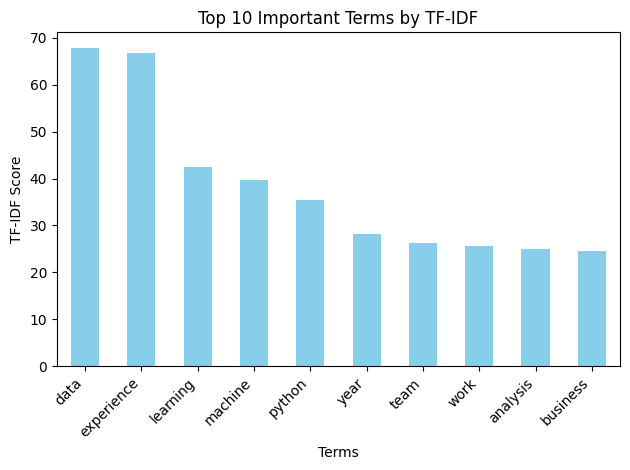

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Apply TF-IDF to the cleaned text
tfidf = TfidfVectorizer(max_features=50)  # Increase max_features to get more terms
X_tfidf = tfidf.fit_transform(df['text_cleaned'])

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Sum the TF-IDF scores across all documents and sort them in descending order
top_terms = tfidf_df.sum().sort_values(ascending=False).head(10)

# Plot the top 10 terms based on TF-IDF scores
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Important Terms by TF-IDF')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Comments

- We will add additional stopwords such as "year," "team," and "work," which are common but not highly informative.

- This refinement will help focus on more domain-specific and technical terms like "data," "python," and "machine learning."


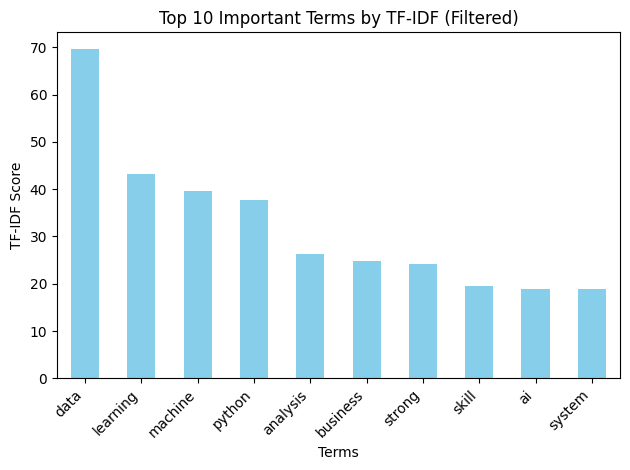

In [27]:
# Add more domain-specific stopwords to filter out generic terms
custom_stopwords = ['ability', 'experience', 'communicate', 'demonstrate', 'empower', 'exercise', 'year', 'team', 'work']

# Step 9: TF-IDF Analysis with additional stopwords
tfidf = TfidfVectorizer(max_features=50, stop_words=custom_stopwords)
X_tfidf = tfidf.fit_transform(df['text_cleaned'])

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Sum the TF-IDF scores across all documents and sort them in descending order
top_terms = tfidf_df.sum().sort_values(ascending=False).head(10)

# Plot the top 10 terms based on TF-IDF scores
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Important Terms by TF-IDF (Filtered)')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Comments

- The most significant terms include "data," "learning," "machine," and "python," which are highly relevant in the context of technical job descriptions.

- These terms suggest a focus on skills related to machine learning, data analysis, and programming (e.g., Python).

- Terms like "strong," "skill," and "AI" further emphasize the importance of technical proficiency in this dataset.


### Comments

- The filtered custom stopwords ensured that generic terms like "ability," "experience," "team," etc., were excluded, leading to a more domain-specific set of important terms.

- Therefore, we will add this custom stopword list to the cleaning function used earlier to further clean the labeled data.


In [60]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Cleaning function
def clean_description(description):
    
    lemmatizer = WordNetLemmatizer()
    # Custom stopwords list to add to standard NLTK stopwords
    custom_stopwords = ['ability', 'experience', 'communicate', 'demonstrate', 'empower', 'exercise', 'year', 'team', 'work']

    # Extend the stopwords with custom stopwords
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords))
    
    # 1. Remove HTML Tags
    soup = BeautifulSoup(description, "html.parser")
    cleaned_description = soup.get_text()

    # 2. Remove Unnecessary Line Breaks and Whitespace
    cleaned_description = re.sub(r'\s+', ' ', cleaned_description).strip()

    # 3. Lowercase Transformation
    cleaned_description = cleaned_description.lower()

    # 4. Remove Special Characters and Punctuation (retain colons, commas, and periods)
    cleaned_description = re.sub(r'[^\w\s.,:]', '', cleaned_description)

    # 5. Remove Numbers
    cleaned_description = re.sub(r'\d+', '', cleaned_description)

    # 6. Remove Stopwords (both default and custom stopwords)
    cleaned_description = ' '.join([word for word in cleaned_description.split() if word not in stop_words])

    # 7. Lemmatization
    cleaned_description = ' '.join([lemmatizer.lemmatize(word) for word in cleaned_description.split()])

    return cleaned_description


In [67]:
df

,out,text,text_cleaned,text_length
0,0.0,job,job,1
1,0.0,seo director technical focus,seo director technical focus,4
2,0.0,seeking experienced seo director lead agency s...,seeking experienced seo director lead agency s...,14
3,0.0,"role, youll drive organic growth client innova...","role, youll drive organic growth client innova...",11
4,0.0,responsibilities:,responsibilities:,1
...,...,...,...,...
771,1.0,fluency multiple programming language statisti...,fluency multiple programming language statisti...,13
772,1.0,experience development machine learning model ...,experience development machine learning model ...,7
773,0.0,ability learn apply new technology,ability learn apply new technology,5
774,1.0,proven experience conducting statistical analy...,proven experience conducting statistical analy...,10


In [76]:
df = df.drop('text_cleaned', axis=1).drop('text_length', axis=1)

In [69]:
df

,out,text
0,0.0,job
1,0.0,seo director technical focus
2,0.0,seeking experienced seo director lead agency s...
3,0.0,"role, youll drive organic growth client innova..."
4,0.0,responsibilities:
...,...,...
771,1.0,fluency multiple programming language statisti...
772,1.0,experience development machine learning model ...
773,0.0,ability learn apply new technology
774,1.0,proven experience conducting statistical analy...


In [77]:
df['text'] = df['text'].apply(clean_description)

C:\Users\nihar\AppData\Local\Temp\ipykernel_8912\1857672619.py:17: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(description, "html.parser")


In [78]:
df

,out,text
0,0.0,job
1,0.0,seo director technical focus
2,0.0,seeking experienced seo director lead agency s...
3,0.0,"role, youll drive organic growth client innova..."
4,0.0,responsibilities:
...,...,...
771,1.0,fluency multiple programming language statisti...
772,1.0,development machine learning model ai framework
773,0.0,learn apply new technology
774,1.0,proven conducting statistical analysis buildin...


### Step 10: Word Cloud Visualization

- We will generate a word cloud to visually represent the most frequent terms in the cleaned job descriptions.
- This helps to quickly identify the dominant terms across the dataset.


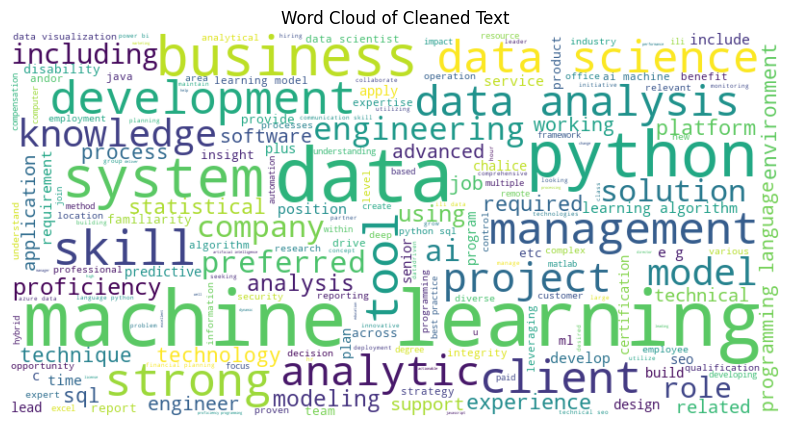

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned text into one large string
text = ' '.join(df['text'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Cleaned Text')
plt.show()


# Comments

- Terms like 'data', 'machine learning', 'python', 'system', and 'development' stand out, indicating the prevalence of technical and analytical skills.
- This confirms that the dataset is focused on skills and expertise related to data science, programming, and business development.
- The custom stopwords we applied have filtered out irrelevant terms, allowing more domain-specific terms to be highlighted in the word cloud.


Saving the Labeled-Cleaned Text to csv for model building 

In [81]:
df.to_csv('labeled_desc_post_eda.csv',encoding="utf-8", index=False)